Combining all the data for doing cleaning and training purpose

In [17]:
import pandas as pd

# List of file paths and corresponding city names
files = [
    (r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Bangalore.csv', 'Bangalore'),
    (r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Chennai.csv', 'Chennai'),
    (r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Delhi.csv', 'Delhi'),
    (r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\Hyderabad.csv', 'Hyderabad'),
    (r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Jaipur.csv', 'Jaipur'),
    (r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Kolkata.csv', 'Kolkata')
]
# Initialize an empty list to store DataFrames
dfs = []

# Iterate through files, read them, add city column, and append to list
for file, city in files:
    df = pd.read_csv(file)
    df['City'] = city
    dfs.append(df)
# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\cars_data.csv', index=False)

Deciding what are the column need to keep and what are unnesscary

In [18]:
import pandas as pd
Car_data=pd.read_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\cars_data_New.csv',low_memory=False)
Car_data.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Miscellaneous6,Miscellaneous7,Miscellaneous8,Miscellaneous9,City,Interior17,Interior18,Safety46,Safety47,Safety48
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,Bangalore,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Ventilated Disc,Drum,Tubeless,Radial,Bangalore,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Disc,Drum,150 kmph,14.3 Seconds,Bangalore,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Disc,Drum,172km/hr,14.2 Seconds,Bangalore,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,Bangalore,NaN,NaN,NaN,NaN,NaN


In [19]:
Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 129 entries, it to Safety48
dtypes: float64(4), int64(4), object(121)
memory usage: 8.2+ MB


Firstly I will seperating the required column based on the Domine knowledge 

Deciding what are the need to do a Furthur analysis and Model training

1 --> it
2 --> ft	
3 --> bt
4--> km
5--> transmission
6--> ownerNo
7--> owner
8--> oem
9--> model
10--> modelYear
11--> centralVariantId
12--> variantName
13--> price	
14--> priceActual
15--> priceSaving
16--> priceFixedText
17--> Registration Year
18--> Insurance Validity
19-->	Fuel Type
20-->	Seats
21-->	Kms Driven
22-->	RTO	
23-->  Ownership
24-->	Engine Displacement
25-->	Year of Manufacture
26-->  Mileage
27-->  Engine
28-->  Max Power
29-->  Torque
30--> Interior 2
31--> Safety1 
32---> Miscellaneous1
33---> City

In [20]:
New_car_data=Car_data[['City','it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price', 'priceActual', 'priceSaving', 'priceFixedText', 'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Year of Manufacture', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Interior2', 'Safety1', 'Miscellaneous1']]
New_car_data.head()

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Ownership,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Interior2,Safety1,Miscellaneous1
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Third Owner,998 cc,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,Heater,Centeral Locking,5 Speed
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Second Owner,1497 cc,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,Heater,Anti Lock Braking System,5 Speed
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,First Owner,1199 cc,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,Heater,Anti Lock Braking System,5 Speed
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,First Owner,1197 cc,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,Heater,Anti Lock Braking System,5 Speed
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,First Owner,1248 cc,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,Heater,Anti Lock Braking System,5 Speed


I found that some data are repeated again so I am going to drop that

centralVariantId

Registration Year not needed since the Model year is there 

MoM - It was a fuel Type

Kms Driven - Since it already present as Km 

Owner and Ownership are same i am droping it - alternative to this i have a Owner Name 

priceActual,priceSaving,priceFixedText is not needed since I am going to predit only Price 

RTO - not needed

In [21]:
New_car_data.drop(['centralVariantId','it','Registration Year','Kms Driven','owner','Ownership','priceActual','priceSaving','priceFixedText','RTO'],axis=1,inplace=True)
New_car_data.head()

C:\Users\sandy\AppData\Local\Temp\ipykernel_37284\371187284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data.drop(['centralVariantId','Registration Year','Kms Driven','owner','Ownership','priceActual','priceSaving','priceFixedText','RTO'],axis=1,inplace=True)


,City,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,...,Seats,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Interior2,Safety1,Miscellaneous1
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,...,5.0,998 cc,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,Heater,Centeral Locking,5 Speed
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,...,5.0,1497 cc,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,Heater,Anti Lock Braking System,5 Speed
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,...,5.0,1199 cc,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,Heater,Anti Lock Braking System,5 Speed
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,...,5.0,1197 cc,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,Heater,Anti Lock Braking System,5 Speed
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,...,5.0,1248 cc,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,Heater,Anti Lock Braking System,5 Speed


I have leftout few columns need to be droped 

In [7]:
New_car_data.drop(['Engine Displacement'],axis=1,inplace=True)
New_car_data.head()

C:\Users\sandy\AppData\Local\Temp\ipykernel_37284\2651806507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data.drop(['Engine Displacement'],axis=1,inplace=True)


,City,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,...,Fuel Type,Seats,Year of Manufacture,Mileage,Engine,Max Power,Torque,Interior2,Safety1,Miscellaneous1
0,Bangalore,0.0,Petrol,Hatchback,"1,20,000",Manual,3.0,Maruti,Maruti Celerio,2015.0,...,Petrol,5.0,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,Heater,Centeral Locking,5 Speed
1,Bangalore,0.0,Petrol,SUV,"32,706",Manual,2.0,Ford,Ford Ecosport,2018.0,...,Petrol,5.0,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,Heater,Anti Lock Braking System,5 Speed
2,Bangalore,0.0,Petrol,Hatchback,"11,949",Manual,1.0,Tata,Tata Tiago,2018.0,...,Petrol,5.0,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,Heater,Anti Lock Braking System,5 Speed
3,Bangalore,0.0,Petrol,Sedan,"17,794",Manual,1.0,Hyundai,Hyundai Xcent,2014.0,...,Petrol,5.0,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,Heater,Anti Lock Braking System,5 Speed
4,Bangalore,0.0,Diesel,SUV,"60,000",Manual,1.0,Maruti,Maruti SX4 S Cross,2015.0,...,Diesel,5.0,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,Heater,Anti Lock Braking System,5 Speed


In [8]:
New_car_data.head()

,City,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,...,Fuel Type,Seats,Year of Manufacture,Mileage,Engine,Max Power,Torque,Interior2,Safety1,Miscellaneous1
0,Bangalore,0.0,Petrol,Hatchback,"1,20,000",Manual,3.0,Maruti,Maruti Celerio,2015.0,...,Petrol,5.0,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,Heater,Centeral Locking,5 Speed
1,Bangalore,0.0,Petrol,SUV,"32,706",Manual,2.0,Ford,Ford Ecosport,2018.0,...,Petrol,5.0,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,Heater,Anti Lock Braking System,5 Speed
2,Bangalore,0.0,Petrol,Hatchback,"11,949",Manual,1.0,Tata,Tata Tiago,2018.0,...,Petrol,5.0,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,Heater,Anti Lock Braking System,5 Speed
3,Bangalore,0.0,Petrol,Sedan,"17,794",Manual,1.0,Hyundai,Hyundai Xcent,2014.0,...,Petrol,5.0,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,Heater,Anti Lock Braking System,5 Speed
4,Bangalore,0.0,Diesel,SUV,"60,000",Manual,1.0,Maruti,Maruti SX4 S Cross,2015.0,...,Diesel,5.0,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,Heater,Anti Lock Braking System,5 Speed


Now for clear understanding I will change the column name 

In [9]:
New_car_data.rename(columns = {'it':'Ignition_type.','ft':'Fuel_type','bt':'Body_type','km':'kilometers_Driven','transmission':'Transmission_Type','ownerNo':'Previous_owners','oem':'Manufactured_By','model':'Model','modelYear':'Model_Year','Interior2':'Interior_system','Safety1':'Safety_features','Miscellaneous1':'Gear_Types'}, inplace =True)
New_car_data.head()

C:\Users\sandy\AppData\Local\Temp\ipykernel_37284\3842963276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data.rename(columns = {'it':'Ignition_type.','ft':'Fuel_type','bt':'Body_type','km':'kilometers_Driven','transmission':'Transmission_Type','ownerNo':'Previous_owners','oem':'Manufactured_By','model':'Model','modelYear':'Model_Year','Interior2':'Interior_system','Safety1':'Safety_features','Miscellaneous1':'Gear_Types'}, inplace =True)


,City,Ignition_type.,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,...,Fuel Type,Seats,Year of Manufacture,Mileage,Engine,Max Power,Torque,Interior_system,Safety_features,Gear_Types
0,Bangalore,0.0,Petrol,Hatchback,"1,20,000",Manual,3.0,Maruti,Maruti Celerio,2015.0,...,Petrol,5.0,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,Heater,Centeral Locking,5 Speed
1,Bangalore,0.0,Petrol,SUV,"32,706",Manual,2.0,Ford,Ford Ecosport,2018.0,...,Petrol,5.0,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,Heater,Anti Lock Braking System,5 Speed
2,Bangalore,0.0,Petrol,Hatchback,"11,949",Manual,1.0,Tata,Tata Tiago,2018.0,...,Petrol,5.0,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,Heater,Anti Lock Braking System,5 Speed
3,Bangalore,0.0,Petrol,Sedan,"17,794",Manual,1.0,Hyundai,Hyundai Xcent,2014.0,...,Petrol,5.0,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,Heater,Anti Lock Braking System,5 Speed
4,Bangalore,0.0,Diesel,SUV,"60,000",Manual,1.0,Maruti,Maruti SX4 S Cross,2015.0,...,Diesel,5.0,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,Heater,Anti Lock Braking System,5 Speed


All the unwanted columns are droped and Renamed the column as per our needs now let do the cleaning process in all the Columns where ever its needed 

In [10]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15251 entries, 0 to 15250
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 15251 non-null  object 
 1   Ignition_type.       6886 non-null   float64
 2   Fuel_type            6886 non-null   object 
 3   Body_type            6884 non-null   object 
 4   kilometers_Driven    6886 non-null   object 
 5   Transmission_Type    6886 non-null   object 
 6   Previous_owners      6886 non-null   float64
 7   Manufactured_By      6886 non-null   object 
 8   Model                6886 non-null   object 
 9   Model_Year           6886 non-null   float64
 10  variantName          15251 non-null  object 
 11  price                6886 non-null   object 
 12  Insurance Validity   15247 non-null  object 
 13  Fuel Type            6886 non-null   object 
 14  Seats                15245 non-null  float64
 15  Year of Manufacture  6872 non-null  

First Let see which are the column having the missing value and how it can be filled But afer observing I thought nearly 11 Columns having a missing values since this columns are not cleaned and data type need to be changed so at that time handeling the missing value become much easier.

In [11]:
New_car_data['Ignition_type'].unique()

KeyError: 'Ignition_type'

In [ ]:
New_car_data['kilometers_Driven']

0       1,20,000
1         32,706
2         11,949
3         17,794
4         60,000
          ...   
8364      10,000
8365    1,20,000
8366      50,000
8367      40,000
8368    1,20,000
Name: kilometers_Driven, Length: 8369, dtype: object

First I will go with the type conversion wherever its needed

kilometers_Driven ---> Need to convert it into a int before that it cleaned so I am doing that

In [ ]:
New_car_data['kilometers_Driven']=New_car_data['kilometers_Driven'].str.replace(',',"")
New_car_data['Engine']=New_car_data['Engine'].str.replace('CC',"")
New_car_data['Mileage']=New_car_data['Mileage'].str.replace('kmpl',"")
New_car_data['Torque']=New_car_data['Torque'].str.replace('Nm',"")
New_car_data['Price']=New_car_data['Price'].str.replace('₹',"")
New_car_data.head()

C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\1956392597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Engine']=New_car_data['Engine'].str.replace('CC',"")
C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\1956392597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Mileage']=New_car_data['Mileage'].str.replace('kmpl',"")


,City,Ignition_type,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,...,Insurance Validity,Seats,Engine Displacement,Mileage,Engine,Max Power,Torque,Interior_system,Safety_features,Gear_Types
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,...,Third Party insurance,5.0,998 cc,23.1,998,67.04,90,Heater,Centeral Locking,5 Speed
1,Bangalore,0,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,...,Comprehensive,5.0,1497 cc,17,1497,121.31,150,Heater,Anti Lock Braking System,5 Speed
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,...,Comprehensive,5.0,1199 cc,23.84,1199,84,114,Heater,Anti Lock Braking System,5 Speed
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,...,Comprehensive,5.0,1197 cc,19.1,1197,81.86,113.75,Heater,Anti Lock Braking System,5 Speed
4,Bangalore,0,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,...,Third Party insurance,5.0,1248 cc,23.65,1248,88.5,200,Heater,Anti Lock Braking System,5 Speed


In [ ]:
New_car_data['Max Power']=New_car_data['Max Power'].str.replace('PS',"")

C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\3468355338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Max Power']=New_car_data['Max Power'].str.replace('PS',"")


In [ ]:
New_car_data['Mileage']=New_car_data['Mileage'].str.replace('km/kg',"")

C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\1249614461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Mileage']=New_car_data['Mileage'].str.replace('km/kg',"")


In [ ]:
New_car_data['Torque']=New_car_data['Torque'].str.replace('NM',"")

C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\2792133712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Torque']=New_car_data['Torque'].str.replace('NM',"")


In [ ]:
New_car_data.to_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Midcheck_data.csv', index=False)

Now I am going to convert price column but there is a issue in that its contains values in thoushands,lahks, and in crs so lets inpect in that column and decide what else I can do.

In [ ]:
filtered_data1 = New_car_data[New_car_data['price'].str.contains('Lakh')]
filtered_data1.count()

City                  8239
Ignition_type         8239
Fuel_type             8239
Body_type             8236
kilometers_Driven     8239
Transmission_Type     8239
Previous_owners       8239
Manufactured_By       8239
Model                 8239
Model_Year            8239
variantName           8239
price                 8239
Insurance Validity    8235
Seats                 8233
Mileage               7967
Engine                8235
Max Power             8194
Torque                8194
Interior_system       8169
Safety_features       8163
Gear_Types            8234
dtype: int64

In [ ]:
filtered_data1

,City,Ignition_type,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,...,price,Insurance Validity,Seats,Mileage,Engine,Max Power,Torque,Interior_system,Safety_features,Gear_Types
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,...,₹ 4 Lakh,Third Party insurance,5.0,23.1,998,67.04,90,Heater,Centeral Locking,5 Speed
1,Bangalore,0,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,...,₹ 8.11 Lakh,Comprehensive,5.0,17,1497,121.31,150,Heater,Anti Lock Braking System,5 Speed
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,...,₹ 5.85 Lakh,Comprehensive,5.0,23.84,1199,84,114,Heater,Anti Lock Braking System,5 Speed
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,...,₹ 4.62 Lakh,Comprehensive,5.0,19.1,1197,81.86,113.75,Heater,Anti Lock Braking System,5 Speed
4,Bangalore,0,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,...,₹ 7.90 Lakh,Third Party insurance,5.0,23.65,1248,88.5,200,Heater,Anti Lock Braking System,5 Speed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,...,₹ 5.10 Lakh,Third Party insurance,5.0,25.24,998,65.71,89,Heater,Anti Lock Braking System,5-Speed
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,...,₹ 1.80 Lakh,Third Party insurance,5.0,22.74,796,47.3,69,Heater,Day Night Rear View Mirror,5 Speed
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,₹ 5.50 Lakh,Third Party insurance,5.0,11.74,1796,186,285,Heater,Anti Lock Braking System,7 Speed
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,...,₹ 1.40 Lakh,Third Party insurance,5.0,18.5,1197,85.80,114,Heater,Anti Lock Braking System,5 Speed


In [ ]:
filtered_data = New_car_data[New_car_data['price'].str.contains('Crore')]
filtered_data.count()

City                  20
Ignition_type         20
Fuel_type             20
Body_type             19
kilometers_Driven     20
Transmission_Type     20
Previous_owners       20
Manufactured_By       20
Model                 20
Model_Year            20
variantName           20
price                 20
Insurance Validity    20
Seats                 20
Mileage               14
Engine                20
Max Power             20
Torque                20
Interior_system       20
Safety_features       20
Gear_Types            20
dtype: int64

In [ ]:
filtered_data

,City,Ignition_type,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,...,price,Insurance Validity,Seats,Mileage,Engine,Max Power,Torque,Interior_system,Safety_features,Gear_Types
823,Bangalore,0,Petrol,SUV,10000,Automatic,1,BMW,BMW X7,2022,...,₹ 1.30 Crore,Third Party insurance,7.0,10.54,2998,335.25,450,Heater,Anti Lock Braking System,8-Speed Steptronic
1612,Chennai,0,Petrol,Sedan,68000,Automatic,1,Mercedes-Benz,Mercedes-Benz S-Class,2018,...,₹ 1.10 Crore,Third Party insurance,4.0,7.81,4663,459,700,Heater,Anti Lock Braking System,9 Speed
1673,Chennai,0,Diesel,Sedan,14000,Automatic,1,Mercedes-Benz,Mercedes-Benz S-Class,2020,...,₹ 1.18 Crore,Comprehensive,5.0,13.5,2925,281.61,600,Heater,Anti Lock Braking System,9 Speed
1768,Chennai,0,Diesel,SUV,52000,Automatic,1,Mercedes-Benz,Mercedes-Benz GLS,2021,...,₹ 1.13 Crore,Comprehensive,7.0,NaN,2925,325.863600-4200rpm,700,Heater,Anti Lock Braking System,9G-TRONIC automatic
3064,Delhi,0,Petrol,SUV,1600,Automatic,1,Land Rover,Land Rover Defender,2023,...,₹ 1.32 Crore,Comprehensive,5.0,9.2,1997,296.3,400,Heater,Anti Lock Braking System,8-Speed Automatic Transmission
3072,Delhi,0,Petrol,SUV,101,Automatic,1,Land Rover,Land Rover Defender,2023,...,₹ 1.32 Crore,Comprehensive,5.0,9.2,1997,296.3,400,Heater,Anti Lock Braking System,8-Speed Automatic Transmission
3115,Delhi,0,Petrol,SUV,16000,Automatic,1,Mercedes-Benz,Mercedes-Benz GLS,2022,...,₹ 1.38 Crore,Comprehensive,7.0,NaN,2999,362.075500-6100,500,Heater,Anti Lock Braking System,9G-TRONIC automatic
3199,Delhi,0,Petrol,SUV,4000,Automatic,1,Mercedes-Benz,Mercedes-Benz AMG G 63,2022,...,₹ 3.95 Crore,Comprehensive,5.0,NaN,3982,576.63,850nm,Heater,Anti Lock Braking System,SPEEDSHIFT TCT 9G
3215,Delhi,0,Petrol,SUV,9500,Automatic,1,BMW,BMW X7,2019,...,₹ 1.10 Crore,Comprehensive,7.0,10.54,2998,335.25,450,Heater,Anti Lock Braking System,8-Speed Steptronic
3223,Delhi,0,Diesel,Sedan,7900,Automatic,1,Mercedes-Benz,Mercedes-Benz S-Class,2021,...,₹ 1.55 Crore,Comprehensive,5.0,13.5,2925,281.61,600,Heater,Anti Lock Braking System,9 Speed


So there are three price range are there 

1st - if list len is 2 -- Thoushands (no need to do anything)

2nd - if list len is 3 --- Lakh if 2nd index is Lakh multiply it by 5 zeros

3rd - if list len is 3 ---  Crore 2nd index is Crore (multiply it by 7 zeros)

First removing the rupees symbol

In [ ]:
New_car_data['price']=New_car_data['price'].str.replace('₹',"")


In [ ]:
New_car_data['price']=New_car_data['price'].str.split(' ')

The Torque have a multiple values in it need to clean that in order to get a cleaned file.

In [ ]:
import pandas as pd
import re

# Function to clean and convert torque values
def clean_and_convert_torque(torque_str):
    # Check if the input is a string
    if isinstance(torque_str, str):
        # Ensure the string is in lowercase for consistent matching
        torque_str = torque_str.lower()
        
        # Check if 'kgm' is present in the string
        if 'kgm' in torque_str:
            # Extract the numerical value before 'kgm'
            match = re.search(r'(\d+(\.\d+)?)\s*kgm', torque_str)
            if match:
                torque_value_kgm = float(match.group(1))
                # Convert kgm to Nm
                return torque_value_kgm * 9.80665
            else:
                return None  # In case 'kgm' is present but no valid number found
        else:
            # Extract the first numerical value in the string if 'kgm' is not present
            match = re.search(r'(\d+(\.\d+)?)', torque_str)
            if match:
                return float(match.group(1))
            else:
                return None  # In case no numerical value is found
    elif isinstance(torque_str, (int, float)):
        # If the input is already a number, return it as is
        return torque_str
    else:
        return None  # In case of any other unexpected format

# Assuming New_car_data is your DataFrame
# Apply the function to the 'Torque' column
New_car_data['Torque_Nm'] = New_car_data['Torque'].apply(clean_and_convert_torque)


In [ ]:
New_car_data['price']

0          [, 4, Lakh]
1       [, 8.11, Lakh]
2       [, 5.85, Lakh]
3       [, 4.62, Lakh]
4       [, 7.90, Lakh]
             ...      
8364    [, 5.10, Lakh]
8365    [, 1.80, Lakh]
8366    [, 5.50, Lakh]
8367    [, 1.40, Lakh]
8368       [, 5, Lakh]
Name: price, Length: 8369, dtype: object

There price are present in three different range so as per the unit preset the converstion will be takes place

In [ ]:
import pandas as pd

# Function to convert value to integer
def convert_to_int(row):
    value = row[1].replace(',', '') 
    if row[2] == 'Lakh':
        return int(float(value) * 1e5)
    elif row[2] == 'Crore':
        return int(float(value) * 1e7)
    elif row[2] == '':  # For values like 75,000 without a unit
        return int(value)
    else:
        return int(value)  # Default conversion

# Apply the conversion to each row in 'price' column
New_car_data['Price'] = New_car_data['price'].apply(convert_to_int)


C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\1213759922.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Price'] = New_car_data['price'].apply(convert_to_int)


Lets compare whether the converstion is done correctly or if there is any error in it. By inspcting this the all the values are converted properly.

In [ ]:
New_car_data[['Price','price']]

,Price,price
0,400000,"[, 4, Lakh]"
1,811000,"[, 8.11, Lakh]"
2,585000,"[, 5.85, Lakh]"
3,462000,"[, 4.62, Lakh]"
4,790000,"[, 7.90, Lakh]"
...,...,...
8364,509999,"[, 5.10, Lakh]"
8365,180000,"[, 1.80, Lakh]"
8366,550000,"[, 5.50, Lakh]"
8367,140000,"[, 1.40, Lakh]"


All the value are converted properly so the old column has beed droped

In [ ]:
#droping the old price column
New_car_data.drop('price',axis=1,inplace=True)
New_car_data.head()

C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\765569042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data.drop('price',axis=1,inplace=True)


,City,Ignition_type,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,...,Insurance Validity,Seats,Mileage,Engine,Max Power,Torque,Interior_system,Safety_features,Gear_Types,Price
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,...,Third Party insurance,5.0,23.1,998,67.04,90,Heater,Centeral Locking,5 Speed,400000
1,Bangalore,0,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,...,Comprehensive,5.0,17,1497,121.31,150,Heater,Anti Lock Braking System,5 Speed,811000
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,...,Comprehensive,5.0,23.84,1199,84,114,Heater,Anti Lock Braking System,5 Speed,585000
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,...,Comprehensive,5.0,19.1,1197,81.86,113.75,Heater,Anti Lock Braking System,5 Speed,462000
4,Bangalore,0,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,...,Third Party insurance,5.0,23.65,1248,88.5,200,Heater,Anti Lock Braking System,5 Speed,790000


checking whether the Ignition type is required or not whether it will impact the result or not

In [ ]:
New_car_data['Ignition_type'].unique()

array([0])

In [ ]:
#droping the Ignition_type column 
"""Since thr Ignition_type is have only one value 0
it won't be useful in any ML algorthm or in any EDA process so I am droping it """
New_car_data.drop('Ignition_type',axis=1,inplace=True)
New_car_data.head()

C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\2722156171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data.drop('Ignition_type',axis=1,inplace=True)


,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Torque,Interior_system,Safety_features,Gear_Types,Price
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,Third Party insurance,5.0,23.1,998,67.04,90,Heater,Centeral Locking,5 Speed,400000
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,Comprehensive,5.0,17,1497,121.31,150,Heater,Anti Lock Braking System,5 Speed,811000
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,Comprehensive,5.0,23.84,1199,84,114,Heater,Anti Lock Braking System,5 Speed,585000
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,Comprehensive,5.0,19.1,1197,81.86,113.75,Heater,Anti Lock Braking System,5 Speed,462000
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,Third Party insurance,5.0,23.65,1248,88.5,200,Heater,Anti Lock Braking System,5 Speed,790000


I have checked all the price have converted sucessfully without any mistakes so I now going to do the standardization part of it converting required column to a required Datatype

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8369 non-null   object 
 1   Fuel_type           8369 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8369 non-null   int64  
 4   Transmission_Type   8369 non-null   object 
 5   Previous_owners     8369 non-null   int64  
 6   Manufactured_By     8369 non-null   object 
 7   Model               8369 non-null   object 
 8   Model_Year          8369 non-null   int64  
 9   variantName         8369 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8363 non-null   float64
 12  Mileage             8082 non-null   object 
 13  Engine              8365 non-null   object 
 14  Max Power           8309 non-null   object 
 15  Torque              8309 non-null   object 
 16  Interi

In [ ]:
New_car_data['Model_Year']

0       2015
1       2018
2       2018
3       2014
4       2015
        ... 
8364    2022
8365    2014
8366    2011
8367    2012
8368    2017
Name: Model_Year, Length: 8369, dtype: int64

Kilometers_driven ---> convert it to int 

Model_Year ----> convert it to Year format

Seats ---> convert it to int format 

Mileage ----> Float 

Engine CC,Max_Power,Torque ---> Converting all this to a Float


In [ ]:

Float=['Mileage','Engine','Max_Power','Torque','Seats']
for j in zip(Float):
    New_car_data[j]=New_car_data[j].astype('float64')

After Converting the datatypes of all the nessary column lets see whether it was perfectly converted or not 

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8369 non-null   object 
 1   Fuel_type           8369 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8369 non-null   int64  
 4   Transmission_Type   8369 non-null   object 
 5   Previous_owners     8369 non-null   int64  
 6   Manufactured_By     8369 non-null   object 
 7   Model               8369 non-null   object 
 8   Model_Year          8369 non-null   int32  
 9   variantName         8369 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8363 non-null   float64
 12  Mileage             8082 non-null   float64
 13  Engine              8365 non-null   float64
 14  Max Power           8309 non-null   float64
 15  Interior_system     8279 non-null   object 
 16  Safety

In [ ]:
New_car_data['Interior_system'].groupby(['Model'])

All the column datatype is converted succesfully now need handle a missing values.

Missing value containing columns -----> 

----> Insurance Validity(String),Interior_system(String),Safety_features(String),Gear_Types(String)

----> Seats(Float),Mileage(Float),Engine(Float),Max Power(Float),Torque_Nm(Float)

First fill the categorical values 

In [ ]:
New_car_data['Interior_system'].isna().sum()

np.int64(90)

In [ ]:
interior_grouped = New_car_data.groupby(['Interior_system'])['Model']

In [ ]:
Final=interior_grouped.unique()
Final

Interior_system
Adjustable Steering               [Tata Indica V2, Renault Fluence, BMW 5 Series...
Digital Clock                                                             [Audi Q5]
Digital Odometer                  [Tata Nexon EV Prime, Maruti Eeco, OpelCorsa, ...
Driving Experience Control Eco                                [Hyundai Santro Xing]
Electronic Multi Tripmeter                               [Tata Indica, Maruti Omni]
Fabric Upholstery                 [Tata Indica V2, Chevrolet Tavera, Maruti 800,...
Glove Compartment                 [Maruti Omni, Mahindra Thar, Maruti Alto, Maru...
Heater                            [Maruti Celerio, Ford Ecosport, Tata Tiago, Hy...
Leather Seats                     [MG Hector Plus, BMW X4, Audi Q5, BMW 3 Series...
Leather Steering Wheel            [MG Hector Plus, Tata Nexon EV Max, BMW X5, Ta...
Tachometer                        [Mahindra Bolero Camper, Datsun GO, Maruti Zen...
Name: Model, dtype: object

In [ ]:
Final.to_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Price_check\unique.csv')

In [ ]:
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Tata Indica V2' ,'Renault Fluence' ,'BMW 5 Series' ,'MG Hector Plus'
 'Mahindra XUV700', 'Fiat Linea', 'Hyundai Kona'])), 'Interior_system'] = 'Adjustable Steering'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Audi Q5'])), 'Interior_system'] = 'Digital Clock'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Tata Nexon EV Prime', 'Maruti Eeco', 'OpelCorsa', 'Tata Indica V2'
 'Tata Nexon EV', 'Hyundai EON', 'Maruti Alto 800'])), 'Interior_system'] = 'Digital Odometer'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Hyundai Santro Xing'])), 'Interior_system'] = 'Driving Experience Control Eco'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Tata Indica', 'Maruti Omni'])), 'Interior_system'] = 'Electronic Multi Tripmeter'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Tata Indica V2', 'Chevrolet Tavera', 'Maruti 800', 'Maruti Zen Estilo'
 'Maruti Alto K10', 'Mahindra Bolero', 'Mahindra Bolero Power Plus',
 'Tata Indica'])), 'Interior_system'] = 'Fabric Upholstery'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Maruti Omni','Mahindra Thar','Maruti Alto','Maruti Gypsy'])), 'Interior_system'] = 'Glove Compartment'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin([
    'Maruti Celerio', 'Ford Ecosport', 'Tata Tiago', 'Hyundai Xcent',
    'Maruti SX4 S Cross', 'Jeep Compass', 'Datsun GO', 'Hyundai Venue',
    'Maruti Ciaz', 'Maruti Baleno', 'Hyundai Grand i10', 'Honda Jazz',
    'Mahindra XUV500', 'Mercedes-Benz GLA', 'Hyundai i20', 'Tata Nexon',
    'Honda City', 'BMW 5 Series', 'Maruti Swift', 'Renault Duster',
    'Mercedes-Benz S-Class', 'Hyundai Santro', 'Hyundai Santro Xing',
    'Mercedes-Benz E-Class', 'Audi A4', 'Maruti Wagon R', 'Maruti Ertiga',
    'Mercedes-Benz C-Class', 'Toyota Fortuner', 'Hyundai Elantra', 'Audi A6',
    'Maruti Alto 800', 'Mahindra Scorpio', 'Mini 3 DOOR', 'Kia Seltos',
    'Maruti Alto', 'Mercedes-Benz GL-Class', 'Tata New Safari', 'Audi Q7',
    'Renault KWID', 'Hyundai Getz', 'Skoda Rapid', 'Hyundai Creta',
    'Tata Harrier', 'BMW 3 Series GT', 'Renault Lodgy', 'Skoda Octavia',
    'Maruti Ritz', 'Volkswagen Polo', 'Mahindra KUV 100', 'BMW X3', 'Hyundai i10',
    'Volvo S60', 'Mahindra XUV300', 'Honda Brio', 'Maruti Alto K10',
    'Renault Kiger', 'Hyundai EON', 'Volkswagen Vento', 'Toyota Yaris',
    'MG Hector', 'Hyundai Alcazar', 'Volkswagen T-Roc', 'BMW 3 Series',
    'Skoda Superb', 'Audi Q5', 'Ford Endeavour', 'Ford Figo', 'Maruti Ignis',
    'Renault Triber', 'BMW X5', 'Hyundai Tucson', 'Hyundai Verna',
    'Mercedes-Benz GLC', 'Nissan Terrano', 'Honda CR-V',
    'Mercedes-Benz A-Class Limousine', 'Toyota Innova', 'Hyundai Santa Fe',
    'BMW 6 Series', 'Maruti Baleno RS', 'Renault Captur', 'Maruti Vitara Brezza',
    'Maruti Swift Dzire', 'Fiat Linea', 'Hyundai i20 Active', 'Honda WR-V',
    'Mahindra Ssangyong Rexton', 'Toyota Corolla Altis', 'Ford Ikon',
    'Mitsubishi Cedia', 'Jaguar XF', 'Audi A3', 'Skoda Kushaq',
    'Volkswagen Taigun', 'MG Astor', 'Hyundai Accent', 'Mercedes-Benz B Class',
    'Kia Carnival', 'Skoda Laura', 'BMW X4', 'Mini Cooper',
    'Land Rover Discovery Sport', 'Volvo XC40', 'Kia Sonet', 'Mahindra Verito',
    'Maruti S-Presso', 'Volkswagen Jetta', 'Datsun RediGO', 'Ford Aspire',
    'Ford Freestyle', 'Audi Q3', 'Tata Tigor', 'Jaguar F-Pace',
    'Mercedes-Benz A Class', 'Toyota Glanza', 'Nissan Magnite',
    'Tata Safari Storme', 'Maruti Celerio X', 'Mercedes-Benz M-Class',
    'Mercedes-Benz GLE', 'Toyota Urban cruiser', 'Mahindra Thar',
    'Mercedes-Benz CLA', 'Mahindra e2o Plus', 'MG Comet EV', 'Volkswagen Tiguan',
    'Tata Altroz', 'Tata Indica V2', 'Toyota Innova Crysta', 'Volkswagen Ameo',
    'BMW X1', 'Chevrolet Cruze', 'Toyota Camry', 'Fiat Punto Abarth',
    'Mahindra TUV 300', 'Chevrolet Beat', 'Maruti 1000', 'Citroen C5 Aircross',
    'Mahindra XUV700', 'Hyundai Grand i10 Nios', 'Mahindra Quanto',
    'Land Rover Freelander 2', 'Mahindra Xylo', 'Tata Zest', 'Honda New Accord',
    'Skoda Yeti', 'Maruti Eeco', 'Maruti SX4', 'Jaguar XE', 'Chevrolet Spark',
    'Hyundai i20 N Line', 'BMW X7', 'Mahindra Renault Logan', 'Citroen C3',
    'Tata Nano', 'Honda Amaze', 'Mahindra Bolero Power Plus', 'Tata Manza',
    'Maruti Esteem', 'Tata Hexa', 'Nissan Micra Active', 'Mitsubishi Lancer',
    'Ford Fiesta', 'Fiat Punto', 'Kia Carens', 'Chevrolet Enjoy',
    'Volkswagen Tiguan Allspace', 'Skoda Slavia', 'Mahindra Marazzo',
    'Tata Indigo', 'Jaguar XJ', 'Skoda Fabia', 'Tata Sumo', 'Nissan Sunny',
    'Fiat Palio', 'Toyota Etios', 'Mahindra Bolero', 'Jeep Meridian',
    'BMW 1 Series', 'Volvo XC 90', 'Audi A3 cabriolet', 'MG Gloster',
    'Land Rover Range Rover Sport', 'Nissan Micra', 'Fiat Punto EVO',
    'Mini Cooper Countryman', 'Maruti A-Star', 'Chevrolet Sail', 'BMW 7 Series',
    'Maruti XL6', 'Hyundai Sonata', 'Honda Civic', 'Maruti Ertiga Tour',
    'Mercedes-Benz GLS', 'Isuzu MU 7', 'Hyundai Aura',
    'BMW 3 Series Gran Limousine', 'Volvo S90', 'Renault Fluence', 'Tata Punch',
    'Honda BR-V', 'Mahindra Scorpio N', 'Skoda Kodiaq', 'Tata Tiago NRG',
    'Datsun GO Plus', 'BMW 2 Series', 'Chevrolet Tavera',
    'Maruti Wagon R Stingray', 'Mini 5 DOOR', 'Fiat Grande Punto',
    'Mahindra KUV 100 NXT', 'Chevrolet Aveo', 'Land Rover Range Rover Velar',
    'Tata Indica', 'Toyota Hyryder', 'Land Rover Range Rover Evoque',
    'Maruti Versa', 'Isuzu MU-X', 'Fiat Punto Pure', 'Honda Mobilio',
    'Volvo S 80', 'Mitsubishi Pajero', 'Audi A8', 'Volvo XC60',
    'Mercedes-Benz AMG GLA 35', 'Mercedes-Benz AMG A 35', 'Volkswagen Virtus',
    'Land Rover Discovery', 'Lexus ES', 'Audi Q2', 'Nissan Kicks',
    'Mahindra TUV 300 Plus', 'Mini Cooper SE', 'Maruti Zen Estilo',
    'Maruti Brezza', 'Jeep Wrangler', 'Mercedes-Benz GLA Class',
    'Toyota Etios Cross', 'Land Rover Defender', 'Toyota Etios Liva',
    'Mercedes-Benz GLC Coupe', 'Lexus RX', 'Mitsubishi Outlander',
    'Mercedes-Benz CLS-Class', 'Maruti Jimny', 'Mini Cooper Clubman',
    'Porsche Cayenne', 'Mercedes-Benz AMG G 63', 'Audi Q3 Sportback',
    'Maruti Swift Dzire Tour', 'Porsche Macan', 'Mercedes-Benz G',
    'Mini Cooper Convertible', 'Toyota Vellfire', 'Toyota Land Cruiser 300',
    'Toyota Fortuner Legender', 'Mahindra Scorpio Classic', 'Mercedes-Benz SLC',
    'Isuzu D-Max', 'Maruti Grand Vitara', 'Chevrolet Optra',
    'Ford Fiesta Classic', 'Maruti FRONX', 'Mahindra Alturas G4', 'Maruti 800',
    'Volkswagen Passat', 'Land Rover Range Rover', 'Fiat Avventura',
    'Renault Scala', 'Honda City Hybrid', 'Tata Aria', 'Volvo V40', 'Tata Bolt',
    'MG ZS EV', 'Mahindra E Verito', 'Hyundai Xcent Prime', 'Mercedes-Benz EQC',
    'Fiat Abarth Avventura', 'Mahindra Bolero Neo', 'Tata Indigo Marina',
    'Chevrolet Captiva', 'Toyota Corolla', 'Volvo S60 Cross Country',
    'Mercedes-Benz AMG GLC 43', 'Chevrolet Aveo U-VA', 'Tata Tigor EV',
    'Porsche 911', 'Renault Pulse', 'Volkswagen CrossPolo',
    'Jeep Compass Trailhawk', 'Tata Sumo Victa', 'Porsche Panamera',
    'Mercedes-Benz AMG GT', 'Audi S5 Sportback', 'Jaguar F-TYPE'
])), 'Interior_system'] = 'Heater'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['MG Hector Plus' ,'BMW X4', 'Audi Q5', 'BMW 3 Series Gran Limousine'])), 'Interior_system'] = 'Leather Seats'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['MG Hector Plus', 'Tata Nexon EV Max', 'BMW X5', 'Tata Nexon EV'])), 'Interior_system'] = 'Leather Steering Wheel'
New_car_data.loc[(New_car_data['Interior_system'].isna()) & (New_car_data['Model'].isin(['Mahindra Bolero Camper', 'Datsun GO', 'Maruti Zen Estilo'
 'Tata Yodha Pickup'])), 'Interior_system'] = 'Tachometer'

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8369 non-null   object 
 1   Fuel_type           8369 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8369 non-null   int64  
 4   Transmission_Type   8369 non-null   object 
 5   Previous_owners     8369 non-null   int64  
 6   Manufactured_By     8369 non-null   object 
 7   Model               8369 non-null   object 
 8   Model_Year          8369 non-null   int32  
 9   variantName         8369 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8363 non-null   float64
 12  Mileage             8082 non-null   float64
 13  Engine              8365 non-null   float64
 14  Max Power           8309 non-null   float64
 15  Interior_system     8369 non-null   object 
 16  Safety

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8369 non-null   object 
 1   Fuel_type           8369 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8369 non-null   int64  
 4   Transmission_Type   8369 non-null   object 
 5   Previous_owners     8369 non-null   int64  
 6   Manufactured_By     8369 non-null   object 
 7   Model               8369 non-null   object 
 8   Model_Year          8369 non-null   int32  
 9   variantName         8369 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8363 non-null   float64
 12  Mileage             8082 non-null   float64
 13  Engine              8365 non-null   float64
 14  Max Power           8309 non-null   float64
 15  Interior_system     8347 non-null   object 
 16  Safety

Now lets fill the Safety_feature_group with the same techquinique

In [ ]:
Safety_feature_grouped = New_car_data.groupby(['Safety_features'])['Model']

In [ ]:
Final=Safety_feature_grouped.unique()


In [ ]:
Final

Safety_features
Adjustable Seats                                                           [Audi Q3]
Anti Lock Braking System           [Ford Ecosport, Tata Tiago, Hyundai Xcent, Mar...
Anti Theft Alarm                                                        [Maruti 800]
Brake Assist                       [Maruti Alto, Maruti Omni, Tata Nano, Maruti V...
Centeral Locking                   [Maruti Celerio, Datsun GO, Hyundai Santro Xin...
Child Safety Locks                 [Hyundai Getz, Hyundai Grand i10, Hyundai EON,...
Day Night Rear View Mirror         [Hyundai i10, Toyota Innova, Mahindra Thar, Ma...
Driver Air Bag                      [Nissan Micra, Maruti Alto 800, BMW X5, Audi Q5]
Engine Immobilizer                               [Mahindra Bolero Pik Up Extra Long]
Halogen Headlamps                                  [Maruti Alto K10, Chevrolet Beat]
Passenger Side Rear View Mirror    [Mahindra Thar, Mahindra Bolero, Maruti Omni, ...
Power Door Locks                   [Chevrolet Spa

In [ ]:
Final.to_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\Price_check\Safety.csv')

In [ ]:


New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Audi Q3'])), 
    'Safety_features'] = 'Adjustable Seats'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Ford Ecosport', 'Tata Tiago', 'Hyundai Xcent', 'Maruti SX4 S Cross',
                                 'Jeep Compass', 'Hyundai Venue', 'Maruti Ciaz', 'Maruti Baleno',
                                 'Hyundai Grand i10', 'Honda Jazz', 'Mahindra XUV500', 'Mercedes-Benz GLA',
                                 'Hyundai i20', 'Tata Nexon', 'Honda City', 'BMW 5 Series', 'Maruti Swift',
                                 'Renault Duster', 'Mercedes-Benz S-Class', 'Hyundai Santro',
                                 'Mercedes-Benz E-Class', 'Audi A4', 'Maruti Ertiga', 'Mercedes-Benz C-Class',
                                 'Toyota Fortuner', 'Hyundai Elantra', 'Audi A6', 'Maruti Alto 800',
                                 'Mahindra Scorpio', 'Mini 3 DOOR', 'Kia Seltos', 'Mercedes-Benz GL-Class',
                                 'Tata New Safari', 'Audi Q7', 'Renault KWID', 'Maruti Celerio', 'Skoda Rapid',
                                 'Hyundai Creta', 'Tata Harrier', 'BMW 3 Series GT', 'Renault Lodgy',
                                 'Skoda Octavia', 'Volkswagen Polo', 'Mahindra KUV 100', 'BMW X3',
                                 'Maruti Wagon R', 'Volvo S60', 'Mahindra XUV300', 'MG Hector Plus',
                                 'Renault Kiger', 'Volkswagen Vento', 'Toyota Yaris', 'MG Hector',
                                 'Hyundai Alcazar', 'Volkswagen T-Roc', 'BMW 3 Series', 'Skoda Superb',
                                 'Audi Q5', 'Maruti Alto K10', 'Ford Endeavour', 'Ford Figo', 'Maruti Ignis',
                                 'Renault Triber', 'BMW X5', 'Hyundai Tucson', 'Hyundai Verna',
                                 'Mercedes-Benz GLC', 'Nissan Terrano', 'Honda CR-V',
                                 'Mercedes-Benz A-Class Limousine', 'Toyota Innova', 'Hyundai Santa Fe',
                                 'BMW 6 Series', 'Maruti Baleno RS', 'Renault Captur', 'Maruti Vitara Brezza',
                                 'Maruti Swift Dzire', 'Fiat Linea', 'Hyundai i20 Active', 'Honda WR-V',
                                 'Mahindra Ssangyong Rexton', 'Toyota Corolla Altis', 'Mitsubishi Cedia',
                                 'Jaguar XF', 'Audi A3', 'Skoda Kushaq', 'Volkswagen Taigun', 'MG Astor',
                                 'Mercedes-Benz B Class', 'Kia Carnival', 'Skoda Laura', 'BMW X4',
                                 'Mini Cooper', 'Land Rover Discovery Sport', 'Volvo XC40', 'Kia Sonet',
                                 'Hyundai i10', 'Maruti S-Presso', 'Maruti Ritz', 'Volkswagen Jetta',
                                 'Datsun RediGO', 'Ford Aspire', 'Ford Freestyle', 'Honda Brio', 'Audi Q3',
                                 'Tata Tigor', 'Jaguar F-Pace', 'Mercedes-Benz A Class', 'Toyota Glanza',
                                 'Nissan Magnite', 'Tata Safari Storme', 'Maruti Celerio X',
                                 'Mercedes-Benz M-Class', 'Mercedes-Benz GLE', 'Toyota Urban cruiser',
                                 'Mahindra Thar', 'Mercedes-Benz CLA', 'MG Comet EV', 'Volkswagen Tiguan',
                                 'Tata Altroz', 'Tata Nexon EV Max', 'Toyota Innova Crysta',
                                 'Volkswagen Ameo', 'Tata Nexon EV Prime', 'BMW X1', 'Chevrolet Cruze',
                                 'Toyota Camry', 'Fiat Punto Abarth', 'Mahindra TUV 300', 'Maruti Eeco',
                                 'Citroen C5 Aircross', 'Mahindra XUV700', 'Hyundai Grand i10 Nios',
                                 'Mahindra Quanto', 'Land Rover Freelander 2', 'Mahindra Xylo', 'Tata Zest',
                                 'Honda New Accord', 'Skoda Yeti', 'Jaguar XE', 'Hyundai i20 N Line', 'BMW X7',
                                 'OpelCorsa', 'Citroen C3', 'Tata Nano', 'Honda Amaze',
                                 'Mahindra Bolero Power Plus', 'Tata Manza', 'Tata Hexa',
                                 'Nissan Micra Active', 'Ford Fiesta', 'Fiat Punto', 'Kia Carens',
                                 'Chevrolet Enjoy', 'Volkswagen Tiguan Allspace', 'Skoda Slavia',
                                 'Mahindra Marazzo', 'Jaguar XJ', 'Skoda Fabia', 'Nissan Sunny',
                                 'Toyota Etios', 'Jeep Meridian', 'BMW 1 Series', 'Volvo XC 90',
                                 'Audi A3 cabriolet', 'MG Gloster', 'Land Rover Range Rover Sport',
                                 'Fiat Punto EVO', 'Mini Cooper Countryman', 'Renault Fluence', 'Maruti SX4',
                                 'Tata Nexon EV', 'BMW 7 Series', 'Datsun GO', 'Maruti XL6', 'Hyundai Sonata',
                                 'Honda Civic', 'Maruti Ertiga Tour', 'Mercedes-Benz GLS', 'Mahindra Bolero',
                                 'Isuzu MU 7', 'Hyundai Aura', 'BMW 3 Series Gran Limousine', 'Volvo S90',
                                 'Nissan Micra', 'Tata Punch', 'Honda BR-V', 'Mahindra Scorpio N',
                                 'Skoda Kodiaq', 'Tata Tiago NRG', 'Datsun GO Plus', 'BMW 2 Series',
                                 'Mini 5 DOOR', 'Fiat Grande Punto', 'Mahindra KUV 100 NXT',
                                 'Land Rover Range Rover Velar', 'Tata Indigo', 'Toyota Hyryder',
                                 'Land Rover Range Rover Evoque', 'Maruti A-Star', 'Isuzu MU-X',
                                 'Honda Mobilio', 'Volvo S 80', 'Mitsubishi Pajero', 'Audi A8', 'Volvo XC60',
                                 'Mercedes-Benz AMG GLA 35', 'Mercedes-Benz AMG A 35', 'Volkswagen Virtus',
                                 'Land Rover Discovery', 'Lexus ES', 'Audi Q2', 'Nissan Kicks',
                                 'Mahindra TUV 300 Plus', 'Mini Cooper SE', 'Maruti Brezza', 'Jeep Wrangler',
                                 'Mercedes-Benz GLA Class', 'Toyota Etios Cross', 'Land Rover Defender',
                                 'Toyota Etios Liva', 'Mercedes-Benz GLC Coupe', 'Lexus RX',
                                 'Mitsubishi Outlander', 'Mercedes-Benz CLS-Class', 'Maruti Jimny',
                                 'Mini Cooper Clubman', 'Porsche Cayenne', 'Mercedes-Benz AMG G 63',
                                 'Audi Q3 Sportback', 'Maruti Swift Dzire Tour', 'Porsche Macan',
                                 'Mercedes-Benz G', 'Mini Cooper Convertible', 'Toyota Vellfire',
                                 'Toyota Land Cruiser 300', 'Toyota Fortuner Legender',
                                 'Mahindra Scorpio Classic', 'Mercedes-Benz SLC', 'Isuzu D-Max',
                                 'Maruti Grand Vitara', 'Chevrolet Optra', 'Mahindra Alturas G4',
                                 'Volkswagen Passat', 'Land Rover Range Rover', 'Fiat Avventura',
                                 'Renault Scala', 'Honda City Hybrid', 'Tata Aria', 'Volvo V40', 'MG ZS EV',
                                 'Mahindra E Verito', 'Hyundai Xcent Prime', 'Mercedes-Benz EQC',
                                 'Fiat Abarth Avventura', 'Mahindra Bolero Neo', 'Chevrolet Sail',
                                 'Chevrolet Captiva', 'Chevrolet Spark', 'Toyota Corolla',
                                 'Volvo S60 Cross Country', 'Mercedes-Benz AMG GLC 43', 'Hyundai Kona',
                                 'Tata Tigor EV', 'Porsche 911', 'Volkswagen CrossPolo',
                                 'Jeep Compass Trailhawk', 'Porsche Panamera', 'Mercedes-Benz AMG GT',
                                 'Audi S5 Sportback', 'Ford Fiesta Classic' 'Jaguar F-TYPE'])),
    'Safety_features'] = 'Anti Lock Braking System'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Maruti 800'])), 
    'Safety_features'] = 'Anti Theft Alarm'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Maruti Alto', 'Maruti Omni', 'Tata Nano', 'Maruti Versa',
                                 'Hyundai Santro Xing', 'Maruti Swift', 'Fiat Linea', 'Fiat Grande Punto'])), 
    'Safety_features'] = 'Brake Assist'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Chevrolet Beat'])), 
    'Safety_features'] = 'Centrally Mounted Fuel Tank'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Chevrolet Optra'])), 
    'Safety_features'] = 'Crash Sensor'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Chevrolet Sail', 'Mahindra Alturas G4', 'Renault Scala',
                                 'Skoda Kodiaq'])), 
    'Safety_features'] = 'Door Ajar Warning'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Fiat Avventura'])), 
    'Safety_features'] = 'Driver Airbag'

New_car_data.loc[
    (New_car_data['Safety_features'].isna()) & 
    (New_car_data['Model'].isin(['Fiat Abarth Avventura', 'Hyundai i10', 'Hyundai i20', 'Fiat Grande Punto'])), 
    'Safety_features'] = 'Passenger Airbag'


        City Fuel_type  Body_type  kilometers_Driven Transmission_Type  \
0  Bangalore    Petrol  Hatchback             120000            Manual   
1  Bangalore    Petrol        SUV              32706            Manual   
2  Bangalore    Petrol  Hatchback              11949            Manual   
3  Bangalore    Petrol      Sedan              17794            Manual   
4  Bangalore    Diesel        SUV              60000            Manual   

   Previous_owners Manufactured_By               Model  Model_Year  \
0                3          Maruti      Maruti Celerio        2015   
1                2            Ford       Ford Ecosport        2018   
2                1            Tata          Tata Tiago        2018   
3                1         Hyundai       Hyundai Xcent        2014   
4                1          Maruti  Maruti SX4 S Cross        2015   

                variantName     Insurance Validity  Seats  Mileage  Engine  \
0                       VXI  Third Party insurance    5.

Now all the categorical value are filled and there is no null value is present except geartype let will that.

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8369 non-null   object 
 1   Fuel_type           8369 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8369 non-null   int64  
 4   Transmission_Type   8369 non-null   object 
 5   Previous_owners     8369 non-null   int64  
 6   Manufactured_By     8369 non-null   object 
 7   Model               8369 non-null   object 
 8   Model_Year          8369 non-null   int32  
 9   variantName         8369 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8363 non-null   float64
 12  Mileage             8082 non-null   float64
 13  Engine              8365 non-null   float64
 14  Max Power           8309 non-null   float64
 15  Interior_system     8369 non-null   object 
 16  Safety

In [ ]:
# Filter rows where 'Model' is not null and 'Gear_Types' is null
filtered_data = New_car_data[New_car_data['Model'].notna() & New_car_data['Gear_Types'].isna()]

filtered_data


,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
1175,Bangalore,Petrol,Hatchback,40000,Manual,3,Maruti,Maruti Estilo,2009,LXI,Third Party insurance,NaN,19.5,1061.0,NaN,Driving Experience Control Eco,Driver Airbag,NaN,200000,NaN
6211,Jaipur,Diesel,SUV,120000,Manual,2,Ford,Ford Endeavour,2008,3.0 4x4 Thunder Plus,Third Party insurance,NaN,11.4,2953.0,NaN,Heater,Anti Lock Braking System,NaN,390000,NaN
7608,Kolkata,Petrol,Hatchback,70000,Manual,2,Maruti,Maruti Estilo,2010,LXI,Third Party insurance,NaN,19.5,1061.0,NaN,Driving Experience Control Eco,Driver Airbag,NaN,120000,NaN
7669,Kolkata,Petrol,Hatchback,50000,Manual,2,Maruti,Maruti Estilo,2009,LXI,Third Party insurance,NaN,19.5,1061.0,NaN,Driving Experience Control Eco,Driver Airbag,NaN,120000,NaN
7745,Kolkata,Diesel,Sedan,120000,Manual,1,Hindustan Motors,Ambassador,2014,Encore BSIV,Third Party insurance,NaN,12.8,1995.0,52.0,Driving Experience Control Eco,Driver Airbag,NaN,120000,106.0


So "Ambassador" have a 6 speed Gear_Types

In [ ]:
A=New_car_data[New_car_data['Model'] == "Ambassador"][['Gear_Types']]
A.head()

,Gear_Types
7063,5 Speed
7398,5 Speed
7745,NaN


So "Ford Endeavour" have a 6 speed Gear_Types

In [ ]:
A=New_car_data[New_car_data['Model'] == "Ford Endeavour"][['Gear_Types']]
A.head()

,Gear_Types
127,6 Speed
416,5 Speed
815,6 Speed
1586,6 Speed
1900,6 Speed


Since "Maruti Estilo" Don't have a any gear type in this dataset I have searched online it shows 5 speed so I am replacing With this 

In [ ]:
A=New_car_data[New_car_data['Model'] == "Maruti Estilo"][['Gear_Types']]
A.head()

,Gear_Types
1175,NaN
7608,NaN
7669,NaN


So based on the model and its gear type need to fill the missing value 

In [ ]:

New_car_data.loc[(New_car_data['Gear_Types'].isna()) & (New_car_data['Model'] == "Maruti Estilo"), 'Gear_Types'] = '5 Speed'
New_car_data.loc[(New_car_data['Gear_Types'].isna()) & (New_car_data['Model'] == "Ambassador"), 'Gear_Types'] = '5 Speed'
New_car_data.loc[(New_car_data['Gear_Types'].isna()) & (New_car_data['Model'] == "Ford Endeavour"), 'Gear_Types'] = '6 Speed'

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8365 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8365 non-null   object 
 1   Fuel_type           8365 non-null   object 
 2   Body_type           8361 non-null   object 
 3   kilometers_Driven   8365 non-null   int64  
 4   Transmission_Type   8365 non-null   object 
 5   Previous_owners     8365 non-null   int64  
 6   Manufactured_By     8365 non-null   object 
 7   Model               8365 non-null   object 
 8   Model_Year          8365 non-null   int32  
 9   variantName         8365 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8359 non-null   float64
 12  Mileage             8078 non-null   float64
 13  Engine              8361 non-null   float64
 14  Max Power           8305 non-null   float64
 15  Interior_system     8365 non-null   object 
 16  Safety_feat

Now need to fill the Body_type so lets check how what to fill

In [ ]:
filtered_data = New_car_data[New_car_data['Model'].notna() & New_car_data['Body_type'].isna()]

filtered_data

,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
3382,Delhi,Petrol,NaN,10500,Automatic,1,Toyota,Toyota Vellfire,2023,VIP Executive Lounge,Comprehensive,7.0,NaN,2487.0,140.0,Heater,Anti Lock Braking System,CVT,11900000,240.0
5390,Hyderabad,Petrol,NaN,13500,Manual,1,Maruti,Maruti Eeco,2019,5 Seater AC BSVI,Comprehensive,5.0,19.71,1197.0,79.0,Heater,Anti Lock Braking System,5 Speed,495000,104.4
5411,Hyderabad,Petrol,NaN,16415,Manual,1,Maruti,Maruti Eeco,2020,5 Seater AC BSVI,Comprehensive,5.0,19.71,1197.0,79.0,Heater,Anti Lock Braking System,5 Speed,520000,104.4
8114,Kolkata,Petrol,NaN,21166,Manual,1,Maruti,Maruti Eeco,2019,5 Seater AC,Comprehensive,5.0,19.71,1197.0,79.0,Heater,Anti Lock Braking System,5 Speed,395000,104.4


Toyota Vellfire does not have a Body type in this dataframe so lets check it online for this

In [ ]:
A=New_car_data[New_car_data['Model'] == "Toyota Vellfire"][['Body_type']]
A.head()

,Body_type
3382,NaN


Maruti Eeco  have a body type as Minivans lets fill the null value with this 

In [ ]:
A=New_car_data[New_car_data['Model'] == "Maruti Eeco"][['Body_type']]
A.head()

,Body_type
682,Minivans
754,Minivans
788,Minivans
959,Minivans
961,Minivans


In [ ]:

New_car_data.loc[(New_car_data['Body_type'].isna()) & (New_car_data['Model'] == "Maruti Eeco"), 'Body_type'] = 'Minivans'
New_car_data.loc[(New_car_data['Body_type'].isna()) & (New_car_data['Model'] == "Toyota Vellfire"), 'Body_type'] = 'Multi-Purpose Vehicle'

Let's check whether all the Categorical column is doesn't contains a null value or not 

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8365 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8365 non-null   object 
 1   Fuel_type           8365 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8365 non-null   int64  
 4   Transmission_Type   8365 non-null   object 
 5   Previous_owners     8365 non-null   int64  
 6   Manufactured_By     8365 non-null   object 
 7   Model               8365 non-null   object 
 8   Model_Year          8365 non-null   int32  
 9   variantName         8365 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8359 non-null   float64
 12  Mileage             8078 non-null   float64
 13  Engine              8361 non-null   float64
 14  Max Power           8305 non-null   float64
 15  Interior_system     8365 non-null   object 
 16  Safety_feat

So all the categorical value containing column is cleaned and don't have any Missing value lets fill the missing value in numerical columns

Column need to fill 

Seats(Float),Mileage(Float),Engine(Float),Max Power(Float),Torque_Nm(Float)

First I Starts with Seats since it have a very less number of missing column

In [ ]:
filtered_data = New_car_data[New_car_data['Model'].notna() & New_car_data['Seats'].isna()]

filtered_data

,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
1175,Bangalore,Petrol,Hatchback,40000,Manual,3,Maruti,Maruti Estilo,2009,LXI,Third Party insurance,NaN,19.5,1061.0,NaN,Driving Experience Control Eco,Driver Airbag,5 Speed,200000,NaN
3528,Delhi,Petrol,SUV,60000,Manual,2,Nissan,Nissan Kicks,2019,Petrol,Third Party insurance,NaN,NaN,1498.0,104.0,Heater,Anti Lock Braking System,5.2 m,700000,142.0
6211,Jaipur,Diesel,SUV,120000,Manual,2,Ford,Ford Endeavour,2008,3.0 4x4 Thunder Plus,Third Party insurance,NaN,11.4,2953.0,NaN,Heater,Anti Lock Braking System,6 Speed,390000,NaN
7608,Kolkata,Petrol,Hatchback,70000,Manual,2,Maruti,Maruti Estilo,2010,LXI,Third Party insurance,NaN,19.5,1061.0,NaN,Driving Experience Control Eco,Driver Airbag,5 Speed,120000,NaN
7669,Kolkata,Petrol,Hatchback,50000,Manual,2,Maruti,Maruti Estilo,2009,LXI,Third Party insurance,NaN,19.5,1061.0,NaN,Driving Experience Control Eco,Driver Airbag,5 Speed,120000,NaN
7745,Kolkata,Diesel,Sedan,120000,Manual,1,Hindustan Motors,Ambassador,2014,Encore BSIV,Third Party insurance,NaN,12.8,1995.0,52.0,Driving Experience Control Eco,Driver Airbag,5 Speed,120000,106.0


It does't have a data I needed so I will search specifically for Seats for Maruti Estilo LXI and fill the Null column For this also it was 5.0 capacity 

In [ ]:
A=New_car_data[New_car_data['Model'] == "Maruti Estilo"][['Seats']]
A.head()

,Seats
1175,NaN
7608,NaN
7669,NaN


For This model I can fill with 5.0

In [ ]:
A=New_car_data[New_car_data['Model'] == "Nissan Kicks"][['Seats']]
A.head()

,Seats
2878,5.0
2911,5.0
3528,NaN
4522,5.0


For This model I can fill with 5.0

In [ ]:
A=New_car_data[New_car_data['Model'] == "Ambassador"][['Seats']]
A.head()

,Seats
7063,5.0
7398,5.0
7745,NaN


For This model I can fill with 7.0

In [ ]:
A=New_car_data[New_car_data['Model'] == "Ford Endeavour"][['Seats']]
A.head()

,Seats
127,7.0
416,7.0
815,7.0
1586,7.0
1900,7.0


Filling the seats based on the respective model

In [ ]:

New_car_data.loc[(New_car_data['Seats'].isna()) & (New_car_data['Model'] == "Ford Endeavour"), 'Seats'] = 7.0
New_car_data.loc[(New_car_data['Seats'].isna()) & (New_car_data['Model'] == "Ambassador"), 'Seats'] = 5.0
New_car_data.loc[(New_car_data['Seats'].isna()) & (New_car_data['Model'] == "Nissan Kicks"), 'Seats'] = 5.0
New_car_data.loc[(New_car_data['Seats'].isna()) & (New_car_data['Model'] == "Maruti Estilo"), 'Seats'] = 5.0

In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8365 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8365 non-null   object 
 1   Fuel_type           8365 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8365 non-null   int64  
 4   Transmission_Type   8365 non-null   object 
 5   Previous_owners     8365 non-null   int64  
 6   Manufactured_By     8365 non-null   object 
 7   Model               8365 non-null   object 
 8   Model_Year          8365 non-null   int32  
 9   variantName         8365 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8365 non-null   float64
 12  Mileage             8078 non-null   float64
 13  Engine              8361 non-null   float64
 14  Max Power           8305 non-null   float64
 15  Interior_system     8365 non-null   object 
 16  Safety_feat

Since there is a null value and the may be the possibility of the extreme values so I have taken the median to fill the null value based to the which model it is.

In [ ]:
Final=New_car_data.groupby('Model').Mileage.median()
Final

Model
Ambassador           12.80
Audi A3              20.38
Audi A3 cabriolet    16.60
Audi A4              17.11
Audi A6              17.68
                     ...  
Volvo S90            18.00
Volvo V40            16.80
Volvo XC 90          17.20
Volvo XC40           12.18
Volvo XC60           11.20
Name: Mileage, Length: 315, dtype: float64

In [ ]:
Final=dict(New_car_data.groupby('Model').Mileage.median())

In [ ]:
Final=New_car_data.groupby('Model').Torque_Nm.median()
Final

Model
Ambassador           106.0
Audi A3              320.0
Audi A3 cabriolet    250.0
Audi A4              350.0
Audi A6              380.0
                     ...  
Volvo S90            400.0
Volvo V40            335.0
Volvo XC 90          480.0
Volvo XC40           300.0
Volvo XC60           400.0
Name: Torque_Nm, Length: 315, dtype: float64

In [ ]:
filtered_data = New_car_data[New_car_data['Model'].notna() & New_car_data['Torque_Nm'].isna()]

filtered_data

Lets fill the Torque and Max power with the mediun value

In [ ]:
import pandas as pd

# Group by 'Model' and calculate the median for 'Torque_Nm' and 'Max Power'
median_values = New_car_data.groupby('Model')[['Torque_Nm', 'Max Power']].median()

# Fill NaN values in 'Torque_Nm' and 'Max Power' with the median values
New_car_data['Torque_Nm'] = New_car_data.apply(
    lambda row: median_values.loc[row['Model'], 'Torque_Nm'] if pd.isna(row['Torque_Nm']) else row['Torque_Nm'], axis=1
)

New_car_data['Max Power'] = New_car_data.apply(
    lambda row: median_values.loc[row['Model'], 'Max Power'] if pd.isna(row['Max Power']) else row['Max Power'], axis=1
)

# Display the updated DataFrame
New_car_data.head()


C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\2915782037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Torque_Nm'] = New_car_data.apply(
C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\2915782037.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Max Power'] = New_car_data.apply(


,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,Third Party insurance,5.0,23.10,998.0,67.0,Heater,Centeral Locking,5 Speed,400000,90.00
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,Comprehensive,5.0,17.00,1497.0,121.0,Heater,Anti Lock Braking System,5 Speed,811000,150.00
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,Comprehensive,5.0,23.84,1199.0,84.0,Heater,Anti Lock Braking System,5 Speed,585000,114.00
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,Comprehensive,5.0,19.10,1197.0,81.0,Heater,Anti Lock Braking System,5 Speed,462000,113.75
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,Third Party insurance,5.0,23.65,1248.0,88.0,Heater,Anti Lock Braking System,5 Speed,790000,200.00


In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8365 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8365 non-null   object 
 1   Fuel_type           8365 non-null   object 
 2   Body_type           8365 non-null   object 
 3   kilometers_Driven   8365 non-null   int64  
 4   Transmission_Type   8365 non-null   object 
 5   Previous_owners     8365 non-null   int64  
 6   Manufactured_By     8365 non-null   object 
 7   Model               8365 non-null   object 
 8   Model_Year          8365 non-null   int32  
 9   variantName         8365 non-null   object 
 10  Insurance Validity  8365 non-null   object 
 11  Seats               8365 non-null   float64
 12  Mileage             8078 non-null   float64
 13  Engine              8361 non-null   float64
 14  Max Power           8356 non-null   float64
 15  Interior_system     8365 non-null   object 
 16  Safety_feat

Now I will do the same process for the mileage column also 

In [ ]:
median_values = New_car_data.groupby('Model')[['Mileage']].median()

# Fill NaN values in 'Torque_Nm' and 'Max Power' with the median values
New_car_data['Torque_Nm'] = New_car_data.apply(
    lambda row: median_values.loc[row['Model'], 'Mileage'] if pd.isna(row['Mileage']) else row['Mileage'], axis=1
)


C:\Users\sandy\AppData\Local\Temp\ipykernel_14036\4251004453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_car_data['Torque_Nm'] = New_car_data.apply(


In [ ]:
New_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8282 non-null   object 
 1   Fuel_type           8282 non-null   object 
 2   Body_type           8282 non-null   object 
 3   kilometers_Driven   8282 non-null   int64  
 4   Transmission_Type   8282 non-null   object 
 5   Previous_owners     8282 non-null   int64  
 6   Manufactured_By     8282 non-null   object 
 7   Model               8282 non-null   object 
 8   Model_Year          8282 non-null   int32  
 9   variantName         8282 non-null   object 
 10  Insurance Validity  8282 non-null   object 
 11  Seats               8282 non-null   float64
 12  Mileage             8282 non-null   float64
 13  Engine              8278 non-null   float64
 14  Max Power           8282 non-null   float64
 15  Interior_system     8282 non-null   object 
 16  Safety_feat

Now lets see the Engine missing values since it is very less I will do it manually by checking

In [ ]:
filtered_data = New_car_data[New_car_data['Model'].notna() & New_car_data['Engine'].isna()]

filtered_data

,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
487,Bangalore,Petrol,SUV,10000,Manual,3,Maruti,Maruti Gypsy,1995,MG410W ST,Third Party insurance,6.0,11.96,NaN,80.0,Glove Compartment,Driver Airbag,6,400000,11.96
490,Bangalore,Petrol,SUV,10000,Manual,3,Maruti,Maruti Gypsy,1995,MG410W HT,Third Party insurance,8.0,11.96,NaN,80.0,Glove Compartment,Driver Airbag,8,400000,11.96
574,Bangalore,Electric,Hatchback,20000,Automatic,1,Mahindra,Mahindra e2o Plus,2017,P6,Third Party insurance,4.0,110.00,NaN,25.0,Heater,Child Safety Locks,Direct Drive,550000,110.00
5510,Hyderabad,Petrol,Sedan,135000,Manual,1,Mercedes-Benz,Mercedes-Benz C-Class,2002,180 elegance,Third Party insurance,5.0,14.84,NaN,178.0,Heater,Anti Lock Braking System,5,225000,14.84


In [ ]:
A=New_car_data[New_car_data['Model'] == "Maruti Gypsy"][['Engine']]
A.head()

,Engine
487,NaN
490,NaN
4685,1298.0


In [ ]:
A=New_car_data[New_car_data['Model'] == "Mahindra e2o Plus"][['Engine']]
A.head()

,Engine
574,NaN
839,72.0


In [ ]:
A=New_car_data[New_car_data['Model'] == "Mercedes-Benz C-Class"][['Engine']]
A.head()

,Engine
36,1950.0
264,2143.0
356,2143.0
539,2143.0
642,2143.0


In [ ]:

New_car_data.loc[(New_car_data['Engine'].isna()) & (New_car_data['Model'] == "Maruti Gypsy"), 'Engine'] = 1298.0
New_car_data.loc[(New_car_data['Engine'].isna()) & (New_car_data['Model'] == "Mahindra e2o Plus"), 'Engine'] = 72.0
New_car_data.loc[(New_car_data['Engine'].isna()) & (New_car_data['Model'] == "Mercedes-Benz C-Class"), 'Engine'] = 2143.0


Finally all the Missing value has been filled

In [ ]:
New_car_data.isnull().sum()

City                  0
Fuel_type             0
Body_type             0
kilometers_Driven     0
Transmission_Type     0
Previous_owners       0
Manufactured_By       0
Model                 0
Model_Year            0
variantName           0
Insurance Validity    0
Seats                 0
Mileage               0
Engine                0
Max Power             0
Interior_system       0
Safety_features       0
Gear_Types            0
Price                 0
Torque_Nm             0
dtype: int64

In [38]:
Final_cleaned=pd.read_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\File_to_merge\New_final_cleaned.csv')
Final_cleaned.head()

,Index,Unnamed: 0,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,...,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
0,0,0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,...,Third Party insurance,5,23.10,998,67.0,Heater,Centeral Locking,5speed,400000,23.10
1,1,1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,...,Comprehensive,5,17.00,1497,121.0,Heater,Anti Lock Braking System,5speed,811000,17.00
2,2,2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,...,Comprehensive,5,23.84,1199,84.0,Heater,Anti Lock Braking System,5speed,585000,23.84
3,3,3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,...,Comprehensive,5,19.10,1197,81.0,Heater,Anti Lock Braking System,5speed,462000,19.10
4,4,4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,...,Third Party insurance,5,23.65,1248,88.0,Heater,Anti Lock Braking System,5speed,790000,23.65


In [40]:
Final_cleaned.drop('Index',axis=1,inplace=True)

So there is no missing value in any column now lets check for any outliers is present 

In [42]:
Final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8282 entries, 0 to 8281
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8282 non-null   object 
 1   Fuel_type           8282 non-null   object 
 2   Body_type           8282 non-null   object 
 3   kilometers_Driven   8282 non-null   int64  
 4   Transmission_Type   8282 non-null   object 
 5   Previous_owners     8282 non-null   int64  
 6   Manufactured_By     8282 non-null   object 
 7   Model               8282 non-null   object 
 8   Model_Year          8282 non-null   int64  
 9   variantName         8282 non-null   object 
 10  Insurance Validity  8282 non-null   object 
 11  Seats               8282 non-null   int64  
 12  Mileage             8282 non-null   float64
 13  Engine              8282 non-null   int64  
 14  Max Power           8282 non-null   float64
 15  Interior_system     8282 non-null   object 
 16  Safety

Lets see which are the column there is a possibility for any outliers 

kilometers_Driven ,Mileage,Engine,Max_Power,Torque_Nm and Lets check Price for safer side.

In [43]:
Final_cleaned

,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,Third Party insurance,5,23.10,998,67.0,Heater,Centeral Locking,5speed,400000,23.10
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,Comprehensive,5,17.00,1497,121.0,Heater,Anti Lock Braking System,5speed,811000,17.00
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,Comprehensive,5,23.84,1199,84.0,Heater,Anti Lock Braking System,5speed,585000,23.84
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,Comprehensive,5,19.10,1197,81.0,Heater,Anti Lock Braking System,5speed,462000,19.10
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,Third Party insurance,5,23.65,1248,88.0,Heater,Anti Lock Braking System,5speed,790000,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8277,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,ZXI BSVI,Third Party insurance,5,25.24,998,65.0,Heater,Anti Lock Braking System,5speed,509999,25.24
8278,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,LXI,Third Party insurance,5,22.74,796,47.0,Heater,Day Night Rear View Mirror,5speed,180000,22.74
8279,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,C 200 CGI Elegance,Third Party insurance,5,11.74,1796,186.0,Heater,Anti Lock Braking System,7speed,550000,11.74
8280,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,ZXi,Third Party insurance,5,18.50,1197,85.0,Heater,Anti Lock Braking System,5speed,140000,18.50


Lets check it with the Describe It will give a general idea of it 

In [61]:
Final_cleaned.describe()

,kilometers_Driven,Previous_owners,Model_Year,Seats,Mileage,Engine,Max Power,Price,Torque_Nm
count,8.281000e+03,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8.281000e+03,8281.000000
mean,5.930019e+04,1.362275,2016.469871,5.201183,19.176880,1424.490279,104.035261,9.302948e+05,19.176880
std,7.434496e+04,0.642795,3.885914,0.658723,4.025627,467.490575,45.142398,1.226689e+06,4.025627
min,0.000000e+00,0.000000,1985.000000,2.000000,7.080000,72.000000,25.000000,2.016100e+04,7.080000
25%,3.055900e+04,1.000000,2014.000000,5.000000,17.000000,1197.000000,78.000000,3.990000e+05,17.000000
50%,5.400000e+04,1.000000,2017.000000,5.000000,18.900000,1248.000000,88.000000,6.000000e+05,18.900000
75%,8.000000e+04,2.000000,2019.000000,5.000000,21.400000,1498.000000,118.000000,9.420000e+05,21.400000
max,5.500000e+06,5.000000,2023.000000,10.000000,140.000000,5000.000000,510.000000,2.600000e+07,140.000000


By seeing this I can able to see there is a clear outlier in Max Power,maybe in Engine,Mileage,Torque_Nm lets visuvalize and check if there is any and 	kilometers_Driven there may be a outlier

C:\Users\sandy\AppData\Local\Temp\ipykernel_37284\1558971839.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Final_cleaned['Max Power'], bins = 70)


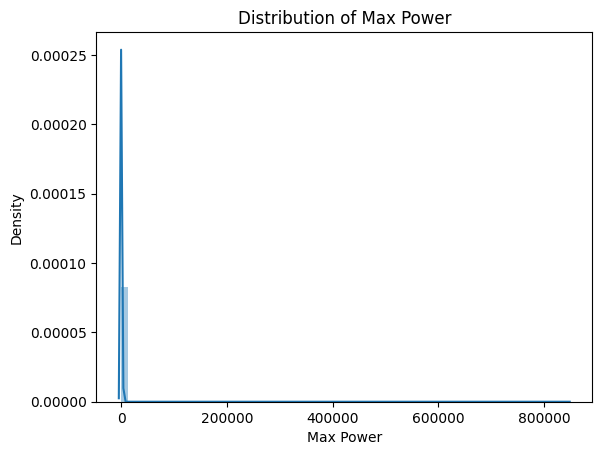

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(Final_cleaned['Max Power'], bins = 70)
plt.title('Distribution of Max Power')
plt.show()

Since there is only one value is too high i was droped the column

In [ ]:
# Drop rows where 'Max Power' is equal to 843750.00
Final_cleaned = Final_cleaned.drop(Final_cleaned[Final_cleaned['Max Power'] == 843750.00].index)

# Verify the row has been removed
print(Final_cleaned['Max Power'].unique())


In [62]:
Final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8281 entries, 0 to 8281
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8281 non-null   object 
 1   Fuel_type           8281 non-null   object 
 2   Body_type           8281 non-null   object 
 3   kilometers_Driven   8281 non-null   int64  
 4   Transmission_Type   8281 non-null   object 
 5   Previous_owners     8281 non-null   int64  
 6   Manufactured_By     8281 non-null   object 
 7   Model               8281 non-null   object 
 8   Model_Year          8281 non-null   int64  
 9   variantName         8281 non-null   object 
 10  Insurance Validity  8281 non-null   object 
 11  Seats               8281 non-null   int64  
 12  Mileage             8281 non-null   float64
 13  Engine              8281 non-null   int64  
 14  Max Power           8281 non-null   float64
 15  Interior_system     8281 non-null   object 
 16  Safety_feat

In [136]:
percentile25 = Final_cleaned['Max Power'].quantile(0.25)
percentile75 = Final_cleaned['Max Power'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

40.0
78.0
118.0


In [137]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

178.0
18.0


In this even though the Max Power of some model go beyond the upper_limit since it was the actuall value of the model I am not doing anything to it I will leave it as it 

In [139]:
Final_cleaned[Final_cleaned['Max Power'] > upper_limit]
Final_cleaned[Final_cleaned['Max Power'] < lower_limit]

,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm


Now lets see for Mileage column if there is any outlier or not.

In [63]:
percentile25 = Final_cleaned['Mileage'].quantile(0.25)
percentile75 = Final_cleaned['Mileage'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

4.399999999999999
17.0
21.4


In [64]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

27.999999999999996
10.400000000000002


In [66]:
average_Mi = Final_cleaned[Final_cleaned['Mileage'] != 0]['Mileage'].mean()

In [124]:
# Filter for 'Mercedes-Benz S-Class' in the 'Model' column
mercedes_s_class = Final_cleaned[Final_cleaned['Model'] == 'Jaguar XJ']

# Calculate the mean for the filtered group
mercedes_s_class_mean = mercedes_s_class['Mileage'].mean()

# Display the mean values
print(round(mercedes_s_class_mean,2))


12.35


In [125]:
Final_cleaned.loc[(Final_cleaned['Mileage']<lower_limit) & (Final_cleaned['Model'] == "Jaguar XJ"), 'Mileage'] = 12.35

In [131]:
Final_cleaned[Final_cleaned['Mileage'] > upper_limit]
Final_cleaned[Final_cleaned['Mileage'] < lower_limit]

,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
3037,Delhi,Petrol,SUV,1600,Automatic,1,Land Rover,Land Rover Defender,2023,2.0 110 HSE,Comprehensive,5,9.20,1997,296.0,Heater,Anti Lock Braking System,8AutomaticTransmission,13200000,9.20
3045,Delhi,Petrol,SUV,101,Automatic,1,Land Rover,Land Rover Defender,2023,2.0 110 HSE,Comprehensive,5,9.20,1997,296.0,Heater,Anti Lock Braking System,8AutomaticTransmission,13200000,9.20
3263,Delhi,Diesel,SUV,38000,Automatic,1,Mercedes-Benz,Mercedes-Benz G,2021,G 350d,Comprehensive,5,8.13,2925,281.0,Heater,Anti Lock Braking System,9GTRONIC,24500000,8.13
3460,Delhi,Petrol,Sedan,37000,Automatic,1,Mercedes-Benz,Mercedes-Benz CLS-Class,2014,350,Comprehensive,4,9.26,3498,306.0,Heater,Anti Lock Braking System,7speed,2700000,9.26
6650,Jaipur,Petrol,Coupe,30000,Automatic,2,Porsche,Porsche 911,2020,Carrera S BSVI,Third Party insurance,4,9.00,2981,443.0,Heater,Anti Lock Braking System,8speed,15000000,9.00


Even taking the mean This column falles under the lower limit so I leave it as it is 


Now let do the same for engine and Torque 

In [140]:
Final_cleaned.describe()

,kilometers_Driven,Previous_owners,Model_Year,Seats,Mileage,Engine,Max Power,Price,Torque_Nm
count,8.281000e+03,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8.281000e+03,8281.000000
mean,5.930019e+04,1.362275,2016.469871,5.201183,19.195637,1424.490279,104.035261,9.302948e+05,19.176880
std,7.434496e+04,0.642795,3.885914,0.658723,3.989578,467.490575,45.142398,1.226689e+06,4.025627
min,0.000000e+00,0.000000,1985.000000,2.000000,8.130000,72.000000,25.000000,2.016100e+04,7.080000
25%,3.055900e+04,1.000000,2014.000000,5.000000,17.000000,1197.000000,78.000000,3.990000e+05,17.000000
50%,5.400000e+04,1.000000,2017.000000,5.000000,18.900000,1248.000000,88.000000,6.000000e+05,18.900000
75%,8.000000e+04,2.000000,2019.000000,5.000000,21.400000,1498.000000,118.000000,9.420000e+05,21.400000
max,5.500000e+06,5.000000,2023.000000,10.000000,140.000000,5000.000000,510.000000,2.600000e+07,140.000000


In [141]:
percentile25 = Final_cleaned['Engine'].quantile(0.25)
percentile75 = Final_cleaned['Engine'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

301.0
1197.0
1498.0


In [142]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1949.5
745.5


In [148]:
max_engine_row = Final_cleaned.loc[Final_cleaned['Engine'].idxmax()]

# Extract the max engine value and the corresponding model
max_engine_cc = max_engine_row['Engine']
max_engine_model = max_engine_row['Model']
max_engine_model1 = max_engine_row['variantName']
print(max_engine_cc)
print(max_engine_model)
print(max_engine_model1)

5000
Jaguar XJ
5.0L


In [150]:
Final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8281 entries, 0 to 8281
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8281 non-null   object 
 1   Fuel_type           8281 non-null   object 
 2   Body_type           8281 non-null   object 
 3   kilometers_Driven   8281 non-null   int64  
 4   Transmission_Type   8281 non-null   object 
 5   Previous_owners     8281 non-null   int64  
 6   Manufactured_By     8281 non-null   object 
 7   Model               8281 non-null   object 
 8   Model_Year          8281 non-null   int64  
 9   variantName         8281 non-null   object 
 10  Insurance Validity  8281 non-null   object 
 11  Seats               8281 non-null   int64  
 12  Mileage             8281 non-null   float64
 13  Engine              8281 non-null   int64  
 14  Max Power           8281 non-null   float64
 15  Interior_system     8281 non-null   object 
 16  Safety_feat

In [156]:
Final_cleaned.head()

,City,Fuel_type,Body_type,kilometers_Driven,Transmission_Type,Previous_owners,Manufactured_By,Model,Model_Year,variantName,Insurance Validity,Seats,Mileage,Engine,Max Power,Interior_system,Safety_features,Gear_Types,Price,Torque_Nm
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,Third Party insurance,5,23.10,998.0,67.0,Heater,Centeral Locking,5speed,400000,23.10
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,Comprehensive,5,17.00,1497.0,121.0,Heater,Anti Lock Braking System,5speed,811000,17.00
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,Comprehensive,5,23.84,1199.0,84.0,Heater,Anti Lock Braking System,5speed,585000,23.84
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,Comprehensive,5,19.10,1197.0,81.0,Heater,Anti Lock Braking System,5speed,462000,19.10
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,Third Party insurance,5,23.65,1248.0,88.0,Heater,Anti Lock Braking System,5speed,790000,23.65


so the conclution is even though it have a value beyhond the upperlimit it was not a false value it is the actual value of the that model so no need to replace this value if I replace that means it was like giving a false value to the that model which will lead to the False result so I will stop this process. so the cleaning process is over I am moving to do a EDA of it. I have just capped the values.

In [157]:
Final_cleaned.to_csv(r'File_to_merge/EDA_analysis_dataset.csv')

In [2]:
import pandas as pd
Price_outlier=pd.read_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\ML_Dataset\Capped_ML_Dataset.csv')
Price_outlier.drop('Index',axis=1,inplace=True)
Price_outlier.drop('New',axis=1,inplace=True)
Price_outlier.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sandy\\Desktop\\Project_realected_practice\\Car_deako\\ML_Dataset\\Capped_ML_Dataset.csv'

In [29]:
Price_outlier.head()

,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Torque_Nm,Car Age,Price
0,Bangalore,Hatchback,Petrol,Manual,Maruti,120000,3,5,23.10,998,23.10,9,400000
1,Bangalore,SUV,Petrol,Manual,Ford,32706,2,5,17.00,1497,17.00,6,811000
2,Bangalore,Hatchback,Petrol,Manual,Tata,11949,1,5,23.84,1199,23.84,6,585000
3,Bangalore,Sedan,Petrol,Manual,Hyundai,17794,1,5,19.10,1197,19.10,10,462000
4,Bangalore,SUV,Diesel,Manual,Maruti,60000,1,5,23.65,1248,23.65,9,790000


In [30]:
percentile25 = Price_outlier['Price'].quantile(0.25)
percentile75 = Price_outlier['Price'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

543000.0
399000.0
942000.0


In [31]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1756500.0
-415500.0


In [32]:
Price_outlier[Price_outlier['Price'] > upper_limit]


,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Torque_Nm,Car Age,Price
5,Bangalore,SUV,Diesel,Manual,Jeep,20000,1,5,17.10,1956,17.10,4,1900000
16,Bangalore,SUV,Diesel,Automatic,Mercedes-Benz,16000,1,5,12.33,1950,12.33,2,5595000
20,Bangalore,Sedan,Diesel,Automatic,BMW,100000,3,5,18.48,1995,18.48,13,2200000
24,Bangalore,Sedan,Petrol,Automatic,Mercedes-Benz,50000,2,5,11.51,4663,7.81,8,4900000
28,Bangalore,Sedan,Petrol,Automatic,Mercedes-Benz,33000,1,5,15.00,1991,15.00,7,4145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,Kolkata,SUV,Diesel,Automatic,Ford,84000,1,7,10.91,3198,10.91,6,2290000
8194,Kolkata,SUV,Diesel,Automatic,Jeep,29000,1,5,14.90,1956,14.90,3,2250000
8195,Kolkata,Sedan,Diesel,Automatic,BMW,23000,1,5,22.69,1995,22.69,6,2275000
8208,Kolkata,SUV,Petrol,Automatic,Audi,32000,1,5,16.90,1395,16.90,6,2100000


In [1]:
Price_outlier.drop('Torque_Nm')

NameError: name 'Price_outlier' is not defined

In [33]:
Price_outlier[Price_outlier['Price'] < lower_limit]

,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Torque_Nm,Car Age,Price


In [34]:
import pandas as pd

columns_to_cap = ['Price','Engine', 'Mileage','kilometers_Driven']

# Using IQR to calculate lower and upper thresholds
for column in columns_to_cap:
    Q1 = Price_outlier[column].quantile(0.05)
    Q3 = Price_outlier[column].quantile(0.95)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the values
    Price_outlier[column] = Price_outlier[column].clip(lower_bound, upper_bound)

In [35]:
Price_outlier.to_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\ML_Dataset\New_Caped_ML_Dataset.csv', index=False)
